In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    return df

In [3]:
df = wrangle(r"C:\Users\sanus\Desktop\DS\web\train.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


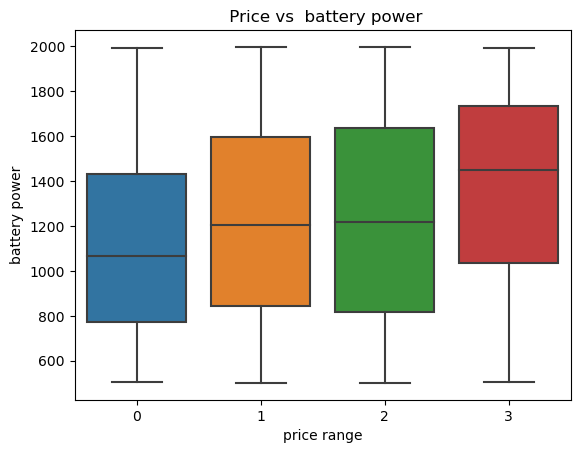

In [5]:
# Create boxplot
sns.boxplot(x="price_range", y="battery_power", data=df)
# Label axes
plt.xlabel("price range")
plt.ylabel("battery power")
plt.title(" Price vs  battery power");

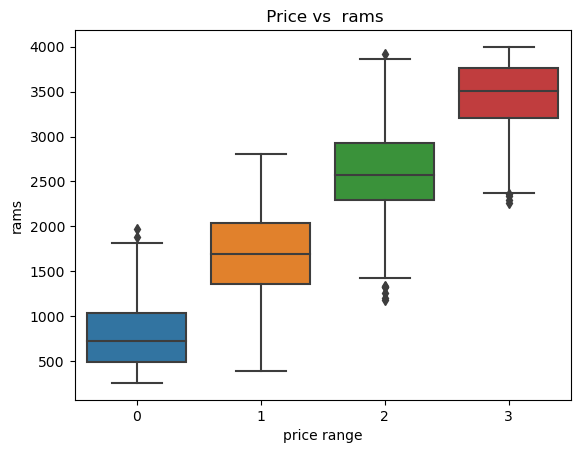

In [6]:
# Create boxplot
sns.boxplot(x="price_range", y="ram", data=df)
# Label axes
plt.xlabel("price range")
plt.ylabel("rams")
plt.title(" Price vs  rams");

# Split

In [8]:
# Create your feature matrix X and target vector y. Your target is "price_range".
target = "price_range"
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2000, 20)
y shape: (2000,)


In [9]:
# Divide your dataset into training and validation sets using a randomized split. Your validation set should be 20% of your data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (1600, 20)
y_train shape: (1600,)
X_val shape: (400, 20)
y_val shape: (400,)


# Build Model
# Baseline

In [11]:
# Calculate the baseline accuracy score for your model
acc_baseline =  y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.26


In [13]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=3000)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

C:\Users\sanus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=3000))])

In [15]:
#Calculate training and validation accuracy score for model_lr.
lr_train_acc = accuracy_score(y_train, model_lr.predict(X_train))
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.733125
Logistic Regression, Validation Accuracy Score: 0.745


Perhaps a decision tree model will perform better than logistic regression, but what's the best hyperparameter value for max_depth? Create a for loop to train and evaluate the model model_dt at all depths from 1 to 15. Be sure to use an appropriate encoder for your model, and to record its training and validation accuracy scores at every depth. The grader will evaluate your validation accuracy scores only.

In [16]:
depth_hyperparams = range(1, 16)
training_acc = []
validation_acc = []
for d in depth_hyperparams:
    model_dt = make_pipeline(
         OrdinalEncoder(), DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    model_dt.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))
    
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3]) 

Training Accuracy Scores: [0.489375, 0.763125, 0.780625]
Validation Accuracy Scores: [0.5425, 0.75, 0.74]


Using the values in training_acc and validation_acc, plot the validation curve for model_dt. Label your x-axis "Max Depth" and your y-axis "Accuracy Score". Use the title "Validation Curve, Decision Tree Model", and include a legend.

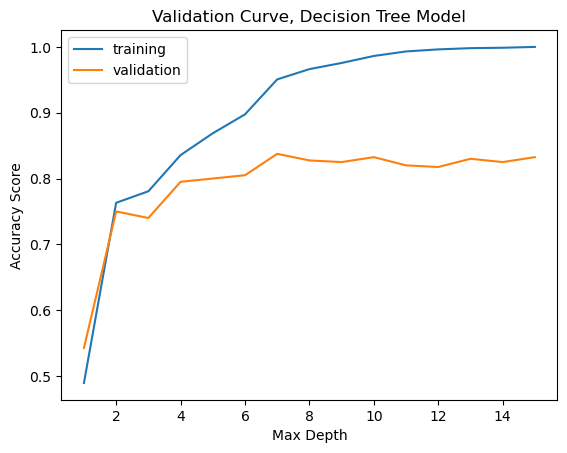

In [17]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve, Decision Tree Model")
plt.legend();

Build and train a new decision tree model final_model_dt, using the value for max_depth that yielded the best validation accuracy score in your plot above.

In [20]:
final_model_dt =  make_pipeline(
         OrdinalEncoder(), DecisionTreeClassifier(max_depth=8, random_state=42)
    )

final_model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [21]:
test_acc = final_model_dt.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.83


In [22]:
test_acc = model_lr.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.74


# Communicate

What are the most important features for final_model_dt? Create a Series Gini feat_imp, where the index labels are the feature names for your dataset and the values are the feature importances for your model. Be sure that the Series is sorted from smallest to largest feature importance.

In [23]:
features = X_train.columns
importances = final_model_dt.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

wifi            0.0
blue            0.0
dual_sim        0.0
four_g          0.0
touch_screen    0.0
dtype: float64

reate a horizontal bar chart of feat_imp. Label your x-axis "Gini Importance" and your y-axis "Label". Use the title " Decision Tree, Feature Importance".

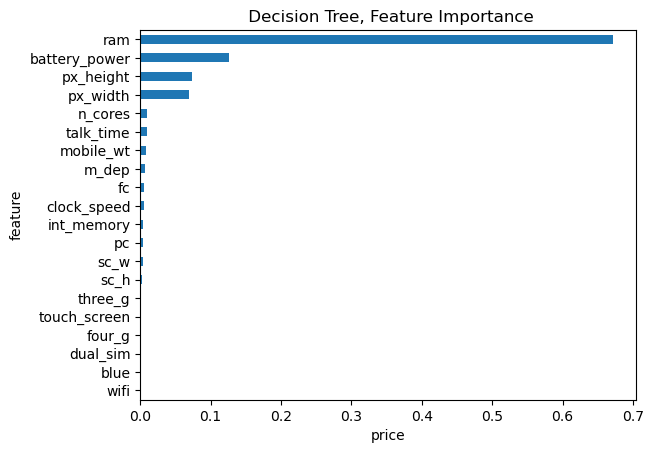

In [25]:
# Create horizontal bar chart of feature importances
feat_imp.plot(kind="barh")
plt.xlabel("price")
plt.ylabel("feature")
plt.title(" Decision Tree, Feature Importance");